In [3]:
!nvidia-smi

Fri Nov 14 17:08:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   30C    P0             53W /  400W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
csv_path = "/content/drive/MyDrive/CPP/battles.csv"

In [6]:
import cudf

gdf = cudf.read_csv(csv_path)
print(len(gdf), "rows")
gdf.head()


16795959 rows


,Unnamed: 0,battleTime,arena.id,gameMode.id,average.startingTrophies,winner.tag,winner.startingTrophies,winner.trophyChange,winner.crowns,winner.kingTowerHitPoints,...,loser.cards.list,loser.totalcard.level,loser.troop.count,loser.structure.count,loser.spell.count,loser.common.count,loser.rare.count,loser.epic.count,loser.legendary.count,loser.elixir.average
0,0,2020-12-07 07:00:00+00:00,54000049.0,72000201.0,6590.0,#28RR8PJP0,6581.0,31.0,2.0,4768.0,...,"[26000000, 26000026, 26000030, 26000041, 27000...",104,4,1,3,4,1,1,2,3.125
1,1,2020-12-07 07:00:00+00:00,54000049.0,72000201.0,5582.5,#YV9VQUVP,5592.0,28.0,3.0,2014.0,...,"[26000000, 26000003, 26000007, 26000011, 26000...",104,6,0,2,2,3,3,0,4.125
2,2,2020-12-07 07:00:02+00:00,54000049.0,72000201.0,5684.0,#LPR2G0Q9L,5678.0,31.0,3.0,5304.0,...,"[26000011, 26000026, 26000030, 26000041, 27000...",103,4,1,3,3,2,2,1,2.875
3,3,2020-12-07 07:00:03+00:00,54000049.0,72000201.0,6031.0,#2GL899VCJ,6035.0,29.0,2.0,3368.0,...,"[26000032, 26000040, 26000041, 26000049, 26000...",104,6,1,1,3,2,1,2,3.375
4,4,2020-12-07 07:00:06+00:00,54000049.0,72000201.0,5140.0,#9Y2YJPGG2,5140.0,30.0,3.0,1507.0,...,"[26000012, 26000024, 26000045, 26000056, 26000...",93,5,1,2,3,1,4,0,3.875


In [7]:
gdf.tail()

,Unnamed: 0,battleTime,arena.id,gameMode.id,average.startingTrophies,winner.tag,winner.startingTrophies,winner.trophyChange,winner.crowns,winner.kingTowerHitPoints,...,loser.cards.list,loser.totalcard.level,loser.troop.count,loser.structure.count,loser.spell.count,loser.common.count,loser.rare.count,loser.epic.count,loser.legendary.count,loser.elixir.average
16795954,16795954,2020-12-27 00:02:00+00:00,54000050.0,72000044.0,5191.5,#2QCQL0VLV,5192.0,29.0,2.0,5832.0,...,"[26000006, 26000011, 26000015, 26000025, 26000...",104,6,0,2,1,1,4,2,4.500
16795955,16795955,2020-12-27 00:02:22+00:00,54000050.0,72000044.0,5336.5,#20P229QVG,5333.0,30.0,3.0,5832.0,...,"[26000009, 26000015, 26000025, 26000039, 26000...",104,5,0,3,1,1,5,1,4.000
16795956,16795956,2020-12-27 00:02:58+00:00,54000050.0,72000044.0,4945.5,#29RYVPPYG,4942.0,30.0,2.0,2967.0,...,"[26000003, 26000007, 26000011, 26000035, 26000...",103,5,0,3,2,2,3,1,3.625
16795957,16795957,2020-12-27 00:03:32+00:00,54000050.0,72000044.0,4211.0,#YUYLJUPYL,4214.0,29.0,3.0,3476.0,...,"[26000022, 26000033, 26000047, 26000051, 26000...",80,5,0,3,2,1,2,3,5.750
16795958,16795958,2020-12-27 00:03:37+00:00,54000050.0,72000044.0,4906.0,#PCG98LUPV,4892.0,32.0,1.0,5304.0,...,"[26000004, 26000011, 26000018, 26000039, 26000...",104,6,1,1,2,4,2,0,4.125


In [8]:
gdf = gdf.drop(columns=['Unnamed: 0', 'battleTime', 'gameMode.id',
                 'winner.clan.tag', 'winner.clan.badgeId',
                 'loser.clan.tag', 'loser.clan.badgeId', 'tournamentTag'])


In [9]:
# ---------------------------
# 1️⃣ Define ID columns
# ---------------------------
id_columns = [
    "winner.cards.list","winner.card1.id","winner.card2.id","winner.card3.id","winner.card4.id",
    "winner.card5.id","winner.card6.id","winner.card7.id","winner.card8.id",
    "loser.cards.list","loser.card1.id","loser.card2.id","loser.card3.id","loser.card4.id",
    "loser.card5.id","loser.card6.id","loser.card7.id","loser.card8.id"
]

# ---------------------------
# 2️⃣ Complete ID → Name mapping (all known cards)
# ---------------------------
id_to_name = {
    # Troops
    "Knight": 26000000, "Archers": 26000001, "Goblins": 26000002, "Giant": 26000003,
    "P.E.K.K.A": 26000004, "Minions": 26000005, "Balloon": 26000006, "Witch": 26000007,
    "Barbarians": 26000008, "Golem": 26000009, "Skeletons": 26000010, "Valkyrie": 26000011,
    "Skeleton Army": 26000012, "Bomber": 26000013, "Musketeer": 26000014, "Baby Dragon": 26000015,
    "Prince": 26000016, "Wizard": 26000017, "Mini P.E.K.K.A": 26000018, "Spear Goblins": 26000019,
    "Giant Skeleton": 26000020, "Hog Rider": 26000021, "Minion Horde": 26000022, "Ice Wizard": 26000023,
    "Royal Giant": 26000024, "Guards": 26000025, "Princess": 26000026, "Dark Prince": 26000027,
    "Three Musketeers": 26000028, "Lava Hound": 26000029, "Ice Spirit": 26000030, "Fire Spirits": 26000031,
    "Miner": 26000032, "Sparky": 26000033, "Bowler": 26000034, "Lumberjack": 26000035,
    "Battle Ram": 26000036, "Inferno Dragon": 26000037, "Ice Golem": 26000038, "Mega Minion": 26000039,
    "Dart Goblin": 26000040, "Goblin Gang": 26000041, "Electro Wizard": 26000042,
    "Elite Barbarians": 26000043, "Hunter": 26000044, "Executioner": 26000045, "Bandit": 26000046,
    "Royal Recruits": 26000047, "Night Witch": 26000048, "Bats": 26000049, "Royal Ghost": 26000050,
    "Ram Rider": 26000051, "Zappies": 26000052, "Rascals": 26000053, "Cannon Cart": 26000054,
    "Mega Knight": 26000055, "Skeleton Barrel": 26000056, "Flying Machine": 26000057,
    "Wall Breakers": 26000058, "Royal Hogs": 26000059, "Goblin Giant": 26000060, "Fisherman": 26000061,
    "Magic Archer": 26000062, "Electro Dragon": 26000063, "Firecracker": 26000064,
    "Elixir Golem": 26000067, "Battle Healer": 26000068, "Skeleton Dragons": 26000080,
    "Mother Witch": 26000083, "Electro Spirit": 26000084, "Electro Giant": 26000085,

    # Buildings
    "Cannon": 27000000, "Goblin Hut": 27000001, "Mortar": 27000002, "Inferno Tower": 27000003,
    "Bomb Tower": 27000004, "Barbarian Hut": 27000005, "Tesla": 27000006,
    "Elixir Collector": 27000007, "X-Bow": 27000008, "Tombstone": 27000009,
    "Furnace": 27000010, "Goblin Cage": 27000012,

    # Spells
    "Fireball": 28000000, "Arrows": 28000001, "Rage": 28000002, "Rocket": 28000003,
    "Goblin Barrel": 28000004, "Freeze": 28000005, "Mirror": 28000006, "Lightning": 28000007,
    "Zap": 28000008, "Poison": 28000009, "Graveyard": 28000010, "The Log": 28000011,
    "Tornado": 28000012, "Clone": 28000013, "Earthquake": 28000014, "Barbarian Barrel": 28000015,
    "Heal Spirit": 28000016, "Giant Snowball": 28000017, "Royal Delivery": 28000018
}

# Reverse: ID (as str) → name
id_to_name = {str(v): k for k, v in id_to_name.items()}
id_map = cudf.Series(list(id_to_name.values()), index=list(id_to_name.keys()))

# ---------------------------
# 3️⃣ Preserve original DataFrame for unmapped check
# ---------------------------
gdf_orig = gdf[id_columns].copy(deep=True)

# ---------------------------
# 4️⃣ Convert IDs to strings
# ---------------------------
for col in id_columns:
    gdf[col] = gdf[col].astype("str")

# ---------------------------
# 5️⃣ Function for list-column replacement
# ---------------------------
def replace_list_column(col):
    cleaned = gdf[col].str.replace(r"[\[\]]", "", regex=True)
    split_df = cleaned.str.split(",", expand=True)
    for c in split_df.columns:
        split_df[c] = split_df[c].str.strip().map(id_map).fillna(split_df[c])
    combined = split_df[0].fillna("")
    for c in split_df.columns[1:]:
        combined = combined.str.cat(split_df[c].fillna(""), sep=",")
    gdf[col] = combined.str.replace("^,|,$", "", regex=True).str.replace(",,", ",", regex=True)

# ---------------------------
# 6️⃣ Apply mapping
# ---------------------------
for col in id_columns:
    if "cards.list" in col:
        replace_list_column(col)
    else:
        gdf[col] = gdf[col].map(id_map).fillna(gdf[col])

# ---------------------------
# 7️⃣ Detect unmapped IDs
# ---------------------------
unmapped = cudf.Series([], dtype="object")

for col in id_columns:
    cleaned = gdf_orig[col].astype("str").str.replace(r"[\[\]]", "", regex=True)
    split_df = cleaned.str.split(",", expand=True)
    for c in split_df.columns:
        tok = split_df[c].str.strip()
        mask_num = tok.str.match(r"^\d+$")
        still_unknown = tok[mask_num & ~tok.isin(id_map.index)]
        unmapped = cudf.concat([unmapped, still_unknown])

unmapped = unmapped.dropna().drop_duplicates().reset_index(drop=True)

print("🧩 IDs that weren't mapped:")
print(unmapped)

# ---------------------------
# ✅ Quick check output
# ---------------------------
print(gdf[["loser.card1.id", "winner.cards.list"]].head())

🧩 IDs that weren't mapped:
Series([], dtype: object)
  loser.card1.id                                  winner.cards.list
0  Goblin Barrel  Battle Ram,Elite Barbarians,Hunter,Royal Ghost...
1         Bomber  Skeleton Army,Wizard,Minion Horde,Royal Giant,...
2    Goblin Gang  P.E.K.K.A,Battle Ram,Electro Wizard,Bandit,Roy...
3          Miner  P.E.K.K.A,Balloon,Witch,Valkyrie,Skeleton Army...
4          Tesla  P.E.K.K.A,Valkyrie,Bomber,Minion Horde,Ram Rid...


In [10]:
null_summary = gdf.isnull().sum().to_pandas()  # move small result to CPU for display
null_summary = null_summary[null_summary > 0]
print(null_summary)


winner.princessTowersHitPoints     358362
loser.kingTowerHitPoints          5034320
loser.princessTowersHitPoints     9164173
dtype: int64


In [11]:
# How many wins where loser.kingTowerHitPoints is null
gdf[gdf['loser.kingTowerHitPoints'].isna()]['winner.crowns'].value_counts()
#null means tower destroyed

winner.crowns
3.0    5034320
Name: count, dtype: int64

In [12]:
# Check winner's princess towers
gdf[gdf['winner.princessTowersHitPoints'].isna()]['winner.crowns'].value_counts()

# Check loser's princess towers
gdf[gdf['loser.princessTowersHitPoints'].isna()]['winner.crowns'].value_counts()

#winner.princessTowersHitPoints     19640
#loser.kingTowerHitPoints          274647
#loser.princessTowersHitPoints     510829

winner.crowns
3.0    5034320
2.0    4129853
Name: count, dtype: int64

In [13]:
gdf['winner.princessTowersHitPoints'] = gdf['winner.princessTowersHitPoints'].fillna(0)
gdf['loser.kingTowerHitPoints'] = gdf['loser.kingTowerHitPoints'].fillna(0)
gdf['loser.princessTowersHitPoints'] = gdf['loser.princessTowersHitPoints'].fillna(0)

In [14]:
gdf.duplicated().sum()

np.int64(36348)

In [15]:
gdf = gdf.drop_duplicates()

In [16]:
gdf['loser.cards.list']

0           Knight,Princess,Ice Spirit,Goblin Gang,Tesla,R...
1           Knight,Giant,Witch,Valkyrie,Bomber,Wizard,Gobl...
2           Valkyrie,Princess,Ice Spirit,Goblin Gang,Infer...
3           Miner,Dart Goblin,Goblin Gang,Bats,Mega Knight...
4           Skeleton Army,Royal Giant,Executioner,Skeleton...
                                  ...                        
16795954    Balloon,Valkyrie,Baby Dragon,Guards,Lava Hound...
16795955    Golem,Baby Dragon,Guards,Mega Minion,Night Wit...
16795956    Giant,Witch,Valkyrie,Lumberjack,Bats,Goblin Ba...
16795957    Minion Horde,Sparky,Royal Recruits,Ram Rider,E...
16795958    P.E.K.K.A,Valkyrie,Mini P.E.K.K.A,Mega Minion,...
Name: loser.cards.list, Length: 16759611, dtype: object

In [17]:
import cudf
from cudf.core.dtypes import ListDtype

WIN_COL = "winner.cards.list"
LOS_COL = "loser.cards.list"

def ensure_listcol(s: cudf.Series) -> cudf.Series:
    """
    Convert string-encoded lists like "[26000000, 26000001, ...]" to a cuDF ListColumn.
    Assumes items are numeric IDs (no internal commas within an item).
    """
    if isinstance(s.dtype, ListDtype):
        return s
    s = s.astype("string").fillna("")
    s = (
        s.str.strip()
         .str.strip("[]")
         .str.replace('"', "", regex=False)
         .str.replace("'", "", regex=False)
    )
    s = s.replace("", None)
    return s.str.split(",")

# 1) Build list columns on GPU
w_list = ensure_listcol(gdf[WIN_COL])
l_list = ensure_listcol(gdf[LOS_COL])

# 2) Canonicalize: sort each deck list on GPU
w_sorted = w_list.list.sort_values()
l_sorted = l_list.list.sort_values()

# 3) Extract the 8 cards into fixed columns (Clash decks are size 8)
#    If some rows don’t have 8, missing positions will be null (handled below).
def to_deck_matrix(lst: cudf.Series) -> cudf.DataFrame:
    out = cudf.DataFrame({f"c{i}": lst.list.get(i) for i in range(8)})
    # cast to int if possible
    for c in out.columns:
        out[c] = out[c].astype("int64", errors="ignore")
    return out

w_decks = to_deck_matrix(w_sorted)
l_decks = to_deck_matrix(l_sorted)

# Define trophy bins and create new columns in gdf
trophy_bins = [0, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000] # Adjust as needed
trophy_labels = [f"{i}-{j-1}" for i, j in zip(trophy_bins[:-1], trophy_bins[1:])]

gdf['winner_trophy_band'] = cudf.cut(gdf['winner.startingTrophies'], bins=trophy_bins, labels=trophy_labels, right=False)
gdf['loser_trophy_band'] = cudf.cut(gdf['loser.startingTrophies'], bins=trophy_bins, labels=trophy_labels, right=False)

# Add trophy bands to the decks, aligning by index
w_decks['trophy_band'] = gdf['winner_trophy_band']
l_decks['trophy_band'] = gdf['loser_trophy_band']

# 4) Drop any rows that don't have a full deck or a valid trophy band
full_row_mask_w = ~w_decks.isnull().any(axis=1) & w_decks['trophy_band'].notna()
full_row_mask_l = ~l_decks.isnull().any(axis=1) & l_decks['trophy_band'].notna()
w_decks_full = w_decks[full_row_mask_w]
l_decks_full = l_decks[full_row_mask_l]

# Update key_cols to include trophy_band
key_cols = [f"c{i}" for i in range(8)] + ["trophy_band"]

# 5) Count wins/losses per canonical deck (GPU)
wins = w_decks_full.groupby(key_cols).size().rename("wins")
losses = l_decks_full.groupby(key_cols).size().rename("losses")

# 6) Join and compute totals/rates (GPU)
deck_stats = wins.to_frame().join(losses.to_frame(), how="outer").fillna(0)
deck_stats["wins"]   = deck_stats["wins"].astype("int64")
deck_stats["losses"] = deck_stats["losses"].astype("int64")
deck_stats["total"]  = deck_stats["wins"] + deck_stats["losses"]
deck_stats["win_rate"] = (deck_stats["wins"] / deck_stats["total"]).fillna(0.0)

# 7) Filter/sort as before (GPU)
min_games = 1
deck_stats = deck_stats[deck_stats["total"] >= min_games] \
                 .sort_values(["total", "win_rate"], ascending=[False, False])

print(deck_stats.head())

                                                                                                        wins  \
c0            c1          c2         c3            c4         c5        c6        c7      trophy_band          
Goblin Barrel Goblin Gang Ice Spirit Inferno Tower Knight     Princess  Rocket    The Log 4500-4999    77375   
Cannon        Fireball    Hog Rider  Ice Golem     Ice Spirit Musketeer Skeletons The Log 4500-4999    67046   
Goblin Barrel Goblin Gang Ice Spirit Inferno Tower Knight     Princess  Rocket    The Log 4000-4499    60871   
Cannon        Fireball    Hog Rider  Ice Golem     Ice Spirit Musketeer Skeletons The Log 4000-4499    45168   
Goblin Barrel Goblin Gang Ice Spirit Inferno Tower Knight     Princess  Rocket    The Log 5000-5499    41501   

                                                                                                       losses  \
c0            c1          c2         c3            c4         c5        c6        c7      trophy_band 

In [20]:
deck_stats = deck_stats.reset_index()  # <-- REQUIRED
deck_stats.head()

,index,c0,c1,c2,c3,c4,c5,c6,c7,trophy_band,wins,losses,total,win_rate
0,0,Goblin Barrel,Goblin Gang,Ice Spirit,Inferno Tower,Knight,Princess,Rocket,The Log,4500-4999,77375,74598,151973,0.509136
1,1,Cannon,Fireball,Hog Rider,Ice Golem,Ice Spirit,Musketeer,Skeletons,The Log,4500-4999,67046,68172,135218,0.495836
2,2,Goblin Barrel,Goblin Gang,Ice Spirit,Inferno Tower,Knight,Princess,Rocket,The Log,4000-4499,60871,56868,117739,0.516999
3,3,Cannon,Fireball,Hog Rider,Ice Golem,Ice Spirit,Musketeer,Skeletons,The Log,4000-4499,45168,51378,96546,0.467839
4,4,Goblin Barrel,Goblin Gang,Ice Spirit,Inferno Tower,Knight,Princess,Rocket,The Log,5000-5499,41501,38073,79574,0.521540


In [35]:
deck_stats.to_csv('deck_stats.csv', index=False)
print('DataFrame saved to deck_stats2.csv')

from google.colab import files
files.download('deck_stats.csv')

DataFrame saved to deck_stats2.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
#what classifies as a good deck,
top_decks = deck_stats.sort_values('win_rate', ascending=False).head(10)
popular_decks = deck_stats.sort_values('total', ascending=False).head(10)
underperforming = deck_stats[(deck_stats['total'] > 50) & (deck_stats['win_rate'] < 0.45)]
overperforming = deck_stats[(deck_stats['total'] > 50) & (deck_stats['win_rate'] > 0.6)]


In [20]:
overperforming

wins  \
c0            c1               c2             c3               c4             c5             c6              c7            trophy_band         
Bats          Dart Goblin      Goblin Barrel  Mega Knight      Prince         Princess       Royal Giant     Skeleton Army 4000-4499    1394   
Baby Dragon   Elixir Collector Golem          Lumberjack       Mega Minion    Night Witch    Tornado         Zap           4500-4999     550   
Goblin Barrel Goblin Gang      Ice Spirit     Inferno Tower    Knight         Princess       Rocket          The Log       0-3999        517   
Arrows        Balloon          Goblin Gang    Lava Hound       Lightning      Mega Minion    Minions         Tombstone     4000-4499     517   
                               Lava Hound     Lightning        Mega Minion    Minions        Skeleton Army   Tombstone     4000-4499     354   
...                                                                                                                                      ...   
Barbarians    Fireball         Flying Machine Furnace          Ice Wizard     Knight         Royal Giant     The Log       5000-5499      31   
Arrows        Bats             Bomber         Elite Barbarians Giant Skeleton Rage           Skeleton Army   Wizard        5000-5499      31   
Archers       Fire Spirits     Ice Spirit     Knight           Mortar         Musketeer      Rocket          The Log       4500-4999      31   
Bats          Goblin Hut       Inferno Dragon Mega Knight      Poison         Royal Ghost    Skeleton Barrel Zap           5000-5499      31   
Baby Dragon   Cannon Cart      Electro Dragon Golem            Mega Minion    Mini P.E.K.K.A The Log         Tornado       5000-5499      31   

                                                                                                                                        losses  \
c0            c1               c2             c3               c4             c5             c6              c7            trophy_band           
Bats          Dart Goblin      Goblin Barrel  Mega Knight      Prince         Princess       Royal Giant     Skeleton Army 4000-4499       919   
Baby Dragon   Elixir Collector Golem          Lumberjack       Mega Minion    Night Witch    Tornado         Zap           4500-4999       362   
Goblin Barrel Goblin Gang      Ice Spirit     Inferno Tower    Knight         Princess       Rocket          The Log       0-3999          314   
Arrows        Balloon          Goblin Gang    Lava Hound       Lightning      Mega Minion    Minions         Tombstone     4000-4499       312   
                               Lava Hound     Lightning        Mega Minion    Minions        Skeleton Army   Tombstone     4000-4499       215   
...                                                                                                                                        ...   
Barbarians    Fireball         Flying Machine Furnace          Ice Wizard     Knight         Royal Giant     The Log       5000-5499        20   
Arrows        Bats             Bomber         Elite Barbarians Giant Skeleton Rage           Skeleton Army   Wizard        5000-5499        20   
Archers       Fire Spirits     Ice Spirit     Knight           Mortar         Musketeer      Rocket          The Log       4500-4999        20   
Bats          Goblin Hut       Inferno Dragon Mega Knight      Poison         Royal Ghost    Skeleton Barrel Zap           5000-5499        20   
Baby Dragon   Cannon Cart      Electro Dragon Golem            Mega Minion    Mini P.E.K.K.A The Log         Tornado       5000-5499        20   

                                                                                                                                        total  \
c0            c1               c2             c3               c4             c5             c6              c7            trophy_band          
Bats          Dart Goblin      Goblin Barrel  Mega Knight      Prince     

In [21]:
gdf

,arena.id,average.startingTrophies,winner.tag,winner.startingTrophies,winner.trophyChange,winner.crowns,winner.kingTowerHitPoints,winner.princessTowersHitPoints,loser.tag,loser.startingTrophies,...,loser.troop.count,loser.structure.count,loser.spell.count,loser.common.count,loser.rare.count,loser.epic.count,loser.legendary.count,loser.elixir.average,winner_trophy_band,loser_trophy_band
0,54000049.0,6590.0,#28RR8PJP0,6581.0,31.0,2.0,4768.0,[1218],#9UU8P008P,6599.0,...,4,1,3,4,1,1,2,3.125,6500-6999,6500-6999
1,54000049.0,5582.5,#YV9VQUVP,5592.0,28.0,3.0,2014.0,[2349],#920GVQ20,5573.0,...,6,0,2,2,3,3,0,4.125,5500-5999,5500-5999
2,54000049.0,5684.0,#LPR2G0Q9L,5678.0,31.0,3.0,5304.0,"[3346, 3346]",#809JCY92J,5690.0,...,4,1,3,3,2,2,1,2.875,5500-5999,5500-5999
3,54000049.0,6031.0,#2GL899VCJ,6035.0,29.0,2.0,3368.0,[2368],#P989UYR90,6027.0,...,6,1,1,3,2,1,2,3.375,6000-6499,6000-6499
4,54000049.0,5140.0,#9Y2YJPGG2,5140.0,30.0,3.0,1507.0,[2236],#PPU9J0UV8,5140.0,...,5,1,2,3,1,4,0,3.875,5000-5499,5000-5499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795954,54000050.0,5191.5,#2QCQL0VLV,5192.0,29.0,2.0,5832.0,"[1003, 91]",#9PYLQ0VYQ,5191.0,...,6,0,2,1,1,4,2,4.500,5000-5499,5000-5499
16795955,54000050.0,5336.5,#20P229QVG,5333.0,30.0,3.0,5832.0,"[1749, 1175]",#G80VR88,5340.0,...,5,0,3,1,1,5,1,4.000,5000-5499,5000-5499
16795956,54000050.0,4945.5,#29RYVPPYG,4942.0,30.0,2.0,2967.0,[1890],#9Q9UPPP2L,4949.0,...,5,0,3,2,2,3,1,3.625,4500-4999,4500-4999
16795957,54000050.0,4211.0,#YUYLJUPYL,4214.0,29.0,3.0,3476.0,[824],#YYGJ2JQL0,4208.0,...,5,0,3,2,1,2,3,5.750,4000-4499,4000-4499


In [ ]:
from cudf.core.dtypes import ListDtype

WIN_COL = "winner.cards.list"
LOS_COL = "loser.cards.list"
TOP_K   = 1000  # adjust as desired

def ensure_listcol(s: cudf.Series) -> cudf.Series:
    """Convert string-encoded lists like 'a,b,c' or "['a','b']" to ListColumn."""
    if isinstance(s.dtype, ListDtype):
        return s
    s = s.astype("string").fillna("")
    s = (
        s.str.strip()
         .str.strip("[]")
         .str.replace('"', "", regex=False)
         .str.replace("'", "", regex=False)
    )
    s = s.replace("", None)
    return s.str.split(",")

# 1) Convert to list columns (GPU)
w_list = ensure_listcol(gdf[WIN_COL])
l_list = ensure_listcol(gdf[LOS_COL])

# 2) Explode (older cuDF uses .explode())
w_ex = w_list.explode().astype("string").str.strip()
l_ex = l_list.explode().astype("string").str.strip()

# 3) Drop nulls/empties
w_ex = w_ex.dropna()
l_ex = l_ex.dropna()
w_ex = w_ex[w_ex != ""]
l_ex = l_ex[l_ex != ""]

# 4) Count wins/losses on GPU
wins = w_ex.value_counts(); wins.name = "w"
losses = l_ex.value_counts(); losses.name = "l"

# 5) Join + compute impact (GPU)
all_counts = wins.to_frame().join(losses.to_frame(), how="outer").fillna(0)
den = all_counts["w"] + all_counts["l"]
all_counts["impact"] = all_counts["w"] / den

# 6) Sort/top-K and (optionally) collect to CPU
card_impact_gdf = all_counts[["impact"]].sort_values("impact", ascending=False).head(TOP_K)
#A card's impact is calculated by looking at how many times it was in a winning deck
#compared to the total number of times it was played (wins + losses). It's essentially Wins / (Wins + Losses) for each individual card.

In [2]:
deck_stats.head()

NameError: name 'deck_stats' is not defined

In [32]:
deck_stats.to_csv('deck_stats.csv', index=False)
print('DataFrame saved to deck_stats2.csv')

from google.colab import files
files.download('deck_stats.csv')

DataFrame saved to deck_stats2.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
card_columns = [f'c{i}' for i in range(8)]
most_played_decks = deck_stats.groupby(card_columns).agg(
    total=('total', 'sum'),
    avg_elixir_cost=('avg_elixir_cost', 'mean'),
    wins=('wins', 'sum'),
    losses=('losses', 'sum'),
    win_rate=('win_rate', 'mean')
).reset_index()
most_played_decks = most_played_decks.sort_values(by='total', ascending=False).head(5)
display(most_played_decks)

KeyError: 'avg_elixir_cost'

In [39]:
#look for how many matches played in each trophy band
matches_per_trophy_band = deck_stats.groupby('trophy_band')['total'].sum().reset_index()
matches_per_trophy_band['total'] = matches_per_trophy_band['total'] / 2
print("Number of matches played in each trophy band:")
print(matches_per_trophy_band)

Number of matches played in each trophy band:
  trophy_band      total
0   4500-4999  7411680.0
1   7000-7499      750.5
2   6500-6999    16603.0
3   7500-7999      447.5
4   5500-5999   536690.5
5   6000-6499   115284.5
6      0-3999   962910.0
7   5000-5499  2593832.5
8   4000-4499  5121323.0


/tmp/ipython-input-2748981860.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='trophy_band', y='total', data=matches_per_trophy_band_pd, palette='viridis')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

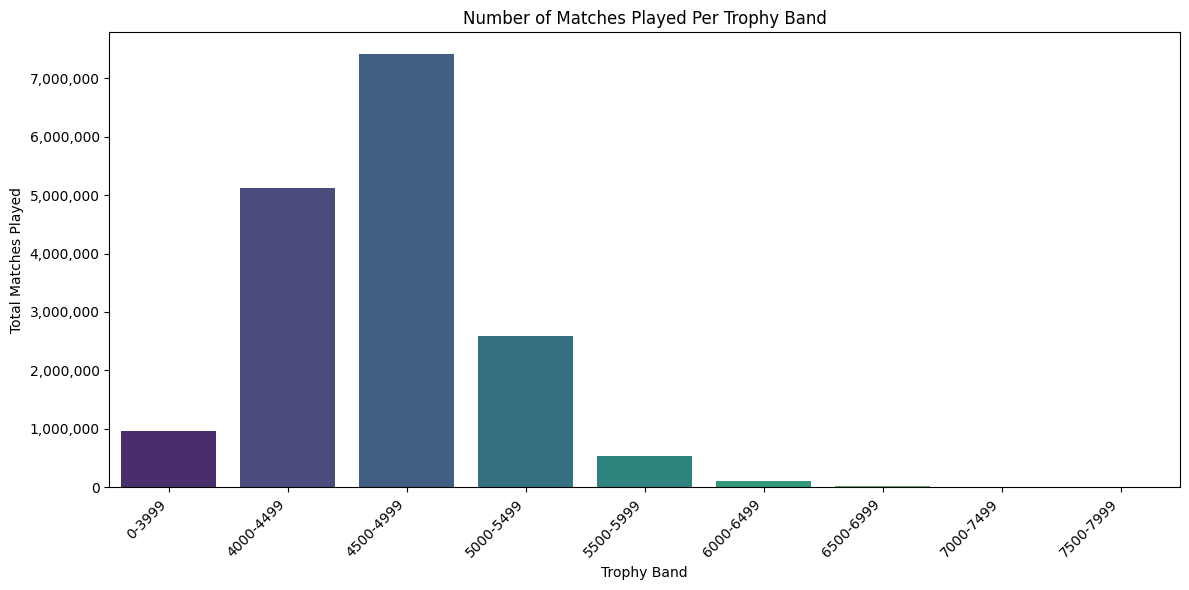

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from google.colab import files

# Convert the cuDF DataFrame to a Pandas DataFrame for plotting with seaborn
matches_per_trophy_band_pd = matches_per_trophy_band.to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(x='trophy_band', y='total', data=matches_per_trophy_band_pd, palette='viridis')
plt.title('Number of Matches Played Per Trophy Band')
plt.xlabel('Trophy Band')
plt.ylabel('Total Matches Played')
plt.xticks(rotation=45, ha='right')

# Format y-axis to avoid scientific notation and use comma separators
formatter = mticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

# Save the figure first
plt.savefig('matches_per_trophy_band.png')

# Then download it
files.download('matches_per_trophy_band.png')

# Then show it
plt.show()

# Finally, clear the figure
plt.clf()

In [ ]:
card_impact_gdf

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from google.colab import files

# Select top 3 and bottom 3 cards
top_3_cards = card_impact_gdf.head(3)
bottom_3_cards = card_impact_gdf.tail(3)

# Combine them into a single cuDF DataFrame
selected_cards_gdf = cudf.concat([top_3_cards, bottom_3_cards])

# Convert to Pandas DataFrame for plotting
selected_cards_pd = selected_cards_gdf.to_pandas().reset_index()
selected_cards_pd.columns = ['card_name', 'impact']

plt.figure(figsize=(10, 6))
sns.barplot(x='card_name', y='impact', data=selected_cards_pd, palette='viridis')

# Calculate dynamic y-axis limits for better visualization of differences
min_impact = selected_cards_pd['impact'].min() - 0.02 # Add a small buffer
max_impact = selected_cards_pd['impact'].max() + 0.02 # Add a small buffer
plt.ylim(min_impact, max_impact)

# Format y-axis to show specific decimal places
formatter = mticker.FormatStrFormatter('%.3f') # Show 3 decimal places
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Top 3 and Bottom 3 Cards by Impact')
plt.xlabel('Card Name')
plt.ylabel('Impact Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure first
plt.savefig('card_impact_top_bottom.png')

# Then download it
#files.download('card_impact_top_bottom.png')

# Then show it
plt.show()

# Finally, clear the figure
plt.clf()

In [28]:
# Combine winner + loser card lists
all_cards = cudf.concat([w_list.explode(), l_list.explode()])

# Drop nulls/empties and clean
all_cards = all_cards.dropna().astype("string").str.strip()
all_cards = all_cards[all_cards != ""]

# Count frequencies on GPU
freq_df = all_cards.value_counts().rename("count").to_frame()

print("Top 10 most used cards:")
print(freq_df.head(10))


Top 10 most used cards:
                  count
Wizard         10265537
Valkyrie        9953552
Zap             9347215
Skeleton Army   9164145
The Log         8825926
Fireball        8354122
Hog Rider       7195559
Mega Knight     7080572
Arrows          6976146
Baby Dragon     6083537


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total usage for each card
all_counts['total_usage'] = all_counts['w'] + all_counts['l']

# Get the top 10 most used cards based on total usage
top_10_cards_stats = all_counts.sort_values(by='total_usage', ascending=False).head(10)

# Convert to Pandas DataFrame for plotting
top_10_cards_stats_pd = top_10_cards_stats.to_pandas().reset_index()
top_10_cards_stats_pd.columns = ['card_name', 'wins', 'losses', 'win_rate', 'total_usage']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot Total Usage Count
sns.barplot(x='card_name', y='total_usage', data=top_10_cards_stats_pd, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Most Used Cards by Total Usage')
axes[0].set_xlabel('Card Name')
axes[0].set_ylabel('Total Usage Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot Win Rate (Impact)
sns.barplot(x='card_name', y='win_rate', data=top_10_cards_stats_pd, palette='viridis', ax=axes[1])
axes[1].set_title('Win Rate (Impact) of Top 10 Most Used Cards')
axes[1].set_xlabel('Card Name')
axes[1].set_ylabel('Win Rate')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(top_10_cards_stats_pd['win_rate'].min() * 0.9, top_10_cards_stats_pd['win_rate'].max() * 1.1) # Adjust y-lim for better visualization

plt.tight_layout()
plt.show()

NameError: name 'all_counts' is not defined

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from google.colab import files

# Get the top 10 most used cards and convert to pandas for plotting
top_10_cards_pd = freq_df.head(10).to_pandas().reset_index()
top_10_cards_pd.columns = ['card_name', 'count']

plt.figure(figsize=(12, 7))
sns.barplot(x='card_name', y='count', data=top_10_cards_pd, palette='viridis')
plt.title('Top 10 Most Used Cards')
plt.xlabel('Card Name')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')

# Format y-axis to avoid scientific notation and use comma separators
formatter = mticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

# Save the figure first
plt.savefig('top_10_used_cards.png')

# Then download it
#files.download('top_10_used_cards.png')

# Then show it
plt.show()

# Finally, clear the figure
plt.clf()

NameError: name 'freq_df' is not defined

In [ ]:
import cudf
from cudf.core.dtypes import ListDtype

WIN_COL = "winner.cards.list"
LOS_COL = "loser.cards.list"

def ensure_listcol(s: cudf.Series) -> cudf.Series:
    """
    Convert string-encoded lists like "[26000000, 26000001, ...]" to a cuDF ListColumn.
    Assumes items are numeric IDs (no internal commas within an item).
    """
    if isinstance(s.dtype, ListDtype):
        return s
    s = s.astype("string").fillna("")
    s = (
        s.str.strip()
         .str.strip("[]")
         .str.replace('"', "", regex=False)
         .str.replace("'", "", regex=False)
    )
    s = s.replace("", None)
    return s.str.split(",")

# 1) Build list columns on GPU
w_list = ensure_listcol(gdf[WIN_COL])
l_list = ensure_listcol(gdf[LOS_COL])

# 2) Canonicalize: sort each deck list on GPU
w_sorted = w_list.list.sort_values()
l_sorted = l_list.list.sort_values()

# 3) Extract the 8 cards into fixed columns (Clash decks are size 8)
#    If some rows don’t have 8, missing positions will be null (handled below).
def to_deck_matrix(lst: cudf.Series) -> cudf.DataFrame:
    out = cudf.DataFrame({f"c{i}": lst.list.get(i) for i in range(8)})
    # cast to int if possible
    for c in out.columns:
        out[c] = out[c].astype("int64", errors="ignore")
    return out

w_decks = to_deck_matrix(w_sorted)
l_decks = to_deck_matrix(l_sorted)

# Add trophy bands to the decks, aligning by index
w_decks['trophy_band'] = gdf['winner_trophy_band']
l_decks['trophy_band'] = gdf['loser_trophy_band']

# 4) Drop any rows that don't have a full deck (optional; or keep and they'll group separately)
full_row_mask_w = ~w_decks.isnull().any(axis=1) & w_decks['trophy_band'].notna()
full_row_mask_l = ~l_decks.isnull().any(axis=1) & l_decks['trophy_band'].notna()
w_decks_full = w_decks[full_row_mask_w]
l_decks_full = l_decks[full_row_mask_l]

# Update key_cols to include trophy_band
key_cols = [f"c{i}" for i in range(8)] + ["trophy_band"]

# 5) Count wins/losses per canonical deck (GPU)
wins = w_decks_full.groupby(key_cols).size().rename("wins")
losses = l_decks_full.groupby(key_cols).size().rename("losses")

# 6) Join and compute totals/rates (GPU)
deck_stats = wins.to_frame().join(losses.to_frame(), how="outer").fillna(0)
deck_stats["wins"]   = deck_stats["wins"].astype("int64")
deck_stats["losses"] = deck_stats["losses"].astype("int64")
deck_stats["total"]  = deck_stats["wins"] + deck_stats["losses"]
deck_stats["win_rate"] = (deck_stats["wins"] / deck_stats["total"]).fillna(0.0)

# 7) Filter/sort as before (GPU)
min_games = 20
deck_stats = deck_stats[deck_stats["total"] >= min_games] \
                 .sort_values(["total", "win_rate"], ascending=[False, False])

print(deck_stats.head())

In [ ]:
# Reattach deck columns (c0–c7) and trophy_band to the stats before export
deck_stats = deck_stats.reset_index()

# Print columns to confirm trophy_band is now a regular column
print("Columns after reset_index():", deck_stats.columns)
print(deck_stats.head())

# Save with cards included
deck_stats.to_csv("deck_stats_with_cards_and_trophy.csv", index=False)

In [ ]:
from google.colab import files
files.download('deck_stats_with_cards_and_trophy.csv')

## Calculate Card Usage per Trophy Band

### Subtask:
Aggregate the melted data by `trophy_band` and `card_name` to sum the `total` usage for each card. This will provide the total number of times each card appears in decks within specific trophy ranges.


**Reasoning**:
To fulfill the subtask, I need to aggregate the `melted_decks` DataFrame by `trophy_band` and `card_name` and sum the `total` column to get the card usage per trophy band.



In [ ]:
card_cols = [f'c{i}' for i in range(8)]

# Convert 'trophy_band' to string type to avoid NotImplementedError with melt
deck_stats['trophy_band'] = deck_stats['trophy_band'].astype(str)

melted_decks = deck_stats.melt(
    id_vars=['trophy_band', 'total'],
    value_vars=card_cols,
    value_name='card_name'
)

print(melted_decks.head())

In [ ]:
card_usage_per_trophy = melted_decks.groupby(['trophy_band', 'card_name'])['total'].sum().reset_index()
print(card_usage_per_trophy.head())

In [ ]:
print(melted_decks.head())

## Identify Top 3 Cards per Trophy Band

### Subtask:
For each `trophy_band`, identify and select the top 3 `card_name` entries based on their aggregated `total` usage. This will pinpoint the most popular cards in different skill tiers.


**Reasoning**:
To identify the top 3 cards for each trophy band, I will group the `card_usage_per_trophy` DataFrame by `trophy_band`, sort each group by `total` usage in descending order, and then select the top 3 cards.



In [ ]:
top_3_cards_per_trophy_band = card_usage_per_trophy.groupby('trophy_band').apply(lambda x: x.nlargest(3, 'total')).reset_index(drop=True)
print(top_3_cards_per_trophy_band.head)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Convert the cuDF DataFrame to a Pandas DataFrame for plotting
top_3_cards_per_trophy_band_pd = top_3_cards_per_trophy_band.to_pandas()

# Get unique trophy bands to create subplots
trophy_bands = top_3_cards_per_trophy_band_pd['trophy_band'].unique()
num_bands = len(trophy_bands)

# Determine grid size for subplots (e.g., 3 columns, adjust rows as needed)
num_cols = 3
num_rows = (num_bands + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 5), squeeze=False)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, band in enumerate(trophy_bands):
    ax = axes[i]
    band_data = top_3_cards_per_trophy_band_pd[top_3_cards_per_trophy_band_pd['trophy_band'] == band]

    # Add hue='card_name' and legend=False to address FutureWarning
    sns.barplot(x='card_name', y='total', data=band_data, palette='viridis', ax=ax, hue='card_name', legend=False)
    ax.set_title(f'Top 3 Cards in {band} Trophy Band')
    ax.set_xlabel('Card Name')
    ax.set_ylabel('Total Usage Count')
    # Removed 'ha='right'' as it's not a valid argument for tick_params
    ax.tick_params(axis='x', rotation=45)

    # Add count labels on top of the bars
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.0f}')

    # Format y-axis to avoid scientific notation and use comma separators
    formatter = mticker.StrMethodFormatter('{x:,.0f}')
    ax.yaxis.set_major_formatter(formatter)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the figure first
plt.savefig('top_3_cards_per_trophy_band_subplots.png')

# Then show it
plt.show()

# Finally, clear the figure
plt.clf()

#shows which cards are most frequently used in unique deck archetypes

In [ ]:
from google.colab import files
files.download('top_3_cards_per_trophy_band_subplots.png')

# Task
Calculate the average elixir cost for each unique deck in the `deck_stats` DataFrame. This will involve retrieving the elixir cost for each card and averaging them for the 8 cards in a deck.

## Calculate Average Elixir Cost for Decks

### Subtask:
Calculate the average elixir cost for each unique deck in the `deck_stats` DataFrame. This will involve retrieving the elixir cost for each card and averaging them for the 8 cards in a deck.


**Reasoning**:
The first step is to define a Python dictionary containing the elixir costs for all known cards, as instructed. This will serve as the source for card elixir values.



In [ ]:
elixir_costs = {
    # Troops
    "Knight": 3, "Archers": 3, "Goblins": 2, "Giant": 5,
    "P.E.K.K.A": 7, "Minions": 3, "Balloon": 5, "Witch": 5,
    "Barbarians": 5, "Golem": 8, "Skeletons": 1, "Valkyrie": 4,
    "Skeleton Army": 3, "Bomber": 3, "Musketeer": 4, "Baby Dragon": 4,
    "Prince": 5, "Wizard": 5, "Mini P.E.K.K.A": 4, "Spear Goblins": 2,
    "Giant Skeleton": 6, "Hog Rider": 4, "Minion Horde": 5, "Ice Wizard": 3,
    "Royal Giant": 6, "Guards": 3, "Princess": 3, "Dark Prince": 4,
    "Three Musketeers": 9, "Lava Hound": 7, "Ice Spirit": 1, "Fire Spirits": 2,
    "Miner": 3, "Sparky": 6, "Bowler": 5, "Lumberjack": 4,
    "Battle Ram": 4, "Inferno Dragon": 4, "Ice Golem": 2, "Mega Minion": 3,
    "Dart Goblin": 3, "Goblin Gang": 3, "Electro Wizard": 4,
    "Elite Barbarians": 6, "Hunter": 4, "Executioner": 5, "Bandit": 3,
    "Royal Recruits": 7, "Night Witch": 4, "Bats": 2, "Royal Ghost": 3,
    "Ram Rider": 5, "Zappies": 4, "Rascals": 5, "Cannon Cart": 5,
    "Mega Knight": 7, "Skeleton Barrel": 3, "Flying Machine": 4,
    "Wall Breakers": 2, "Royal Hogs": 5, "Goblin Giant": 6, "Fisherman": 3,
    "Magic Archer": 4, "Electro Dragon": 5, "Firecracker": 3,
    "Elixir Golem": 3, "Battle Healer": 4, "Skeleton Dragons": 4,
    "Mother Witch": 4, "Electro Spirit": 1, "Electro Giant": 8,

    # Buildings
    "Cannon": 3, "Goblin Hut": 5, "Mortar": 4, "Inferno Tower": 5,
    "Bomb Tower": 4, "Barbarian Hut": 7, "Tesla": 4,
    "Elixir Collector": 6, "X-Bow": 6, "Tombstone": 3,
    "Furnace": 4, "Goblin Cage": 4,

    # Spells
    "Fireball": 4, "Arrows": 3, "Rage": 2, "Rocket": 6,
    "Goblin Barrel": 3, "Freeze": 4, "Mirror": 1, "Lightning": 6,
    "Zap": 2, "Poison": 4, "Graveyard": 5, "The Log": 2,
    "Tornado": 3, "Clone": 3, "Earthquake": 3, "Barbarian Barrel": 3,
    "Heal Spirit": 1, "Giant Snowball": 2, "Royal Delivery": 3
}

**Reasoning**:
The next step is to convert the `elixir_costs` dictionary into a cuDF Series for efficient lookup, ensuring the index is the card names and the values are their elixir costs.



In [ ]:
import cudf
elixir_map = cudf.Series(elixir_costs, index=list(elixir_costs.keys()), name='elixir_cost')
print(elixir_map.head())

**Reasoning**:
As per the instructions, the next step is to initialize a new column `elixir_sum` in the `deck_stats` DataFrame, setting all its values to 0.



In [ ]:
deck_stats['elixir_sum'] = 0
print(deck_stats.head().sort_values(by='win_rate', ascending=False))

**Reasoning**:
The next step is to iterate through each of the eight card columns (c0 to c7) in the `deck_stats` DataFrame. For each card, I will map its name to its corresponding elixir cost using the `elixir_map` Series and add this cost to the `elixir_sum` column. This will populate the `elixir_sum` for each deck.



In [ ]:
card_cols = [f'c{i}' for i in range(8)]

for col in card_cols:
    deck_stats['elixir_sum'] += deck_stats[col].map(elixir_map).fillna(0) # Fill NaN with 0 if a card's elixir cost is not found

print(deck_stats.head())

**Reasoning**:
Now that the `elixir_sum` is calculated for each deck, the next step is to compute the average elixir cost by dividing `elixir_sum` by 8 (the number of cards in a deck) and store it in a new column `avg_elixir_cost`. Afterwards, the temporary `elixir_sum` column will be dropped.



In [ ]:
deck_stats['avg_elixir_cost'] = deck_stats['elixir_sum'] / 8
deck_stats = deck_stats.drop(columns=['elixir_sum'])

print(deck_stats.head())

In [ ]:
gdf

In [ ]:
import pandas as pd

# Convert cuDF DataFrame to Pandas DataFrame
df_cpu = gdf.to_pandas()

# Save to CSV
df_cpu.to_csv('cleaned_gdf.csv', index=False)
print('DataFrame saved to cleaned_gdf.csv')


In [ ]:
from google.colab import files
files.download('cleaned_gdf.csv')


# Task
Recalculate the total number of matches per trophy band, ensuring each match is counted once to avoid double counting. Then, visualize these matches using a bar plot, save the plot as 'matches_per_trophy_band.png', display it, and finally, summarize the findings by highlighting the trophy bands with the most and least activity.

## Recalculate Matches Per Trophy Band

### Subtask:
Recalculate the total number of matches (where a deck appeared) for each trophy band, ensuring that each match is counted once to avoid double counting winner and loser. The result will be stored in `matches_per_trophy_band`.


**Reasoning**:
To recalculate the total number of matches per trophy band, I will group the `deck_stats` DataFrame by 'trophy_band', sum the 'total' column (which represents the sum of wins and losses for each deck), and then divide the sum by 2 to count each match only once.



In [22]:
matches_per_trophy_band = deck_stats.groupby('trophy_band')['total'].sum().reset_index()
matches_per_trophy_band['total'] = matches_per_trophy_band['total'] / 2
print("Number of matches played in each trophy band:")
print(matches_per_trophy_band)

Number of matches played in each trophy band:
  trophy_band      total
0   4500-4999  7411680.0
1   7000-7499      750.5
2   6500-6999    16603.0
3   7500-7999      447.5
4   5500-5999   536690.5
5   6000-6499   115284.5
6      0-3999   962910.0
7   5000-5499  2593832.5
8   4000-4499  5121323.0


## Visualize Matches Per Trophy Band

### Subtask:
Generate a bar plot to visualize the total number of matches played within each trophy band. The plot will be saved as 'matches_per_trophy_band.png' and displayed.


**Reasoning**:
To visualize the total number of matches per trophy band, I will generate a bar plot using the `matches_per_trophy_band` DataFrame, following the instructions for plotting, saving, and displaying the figure.



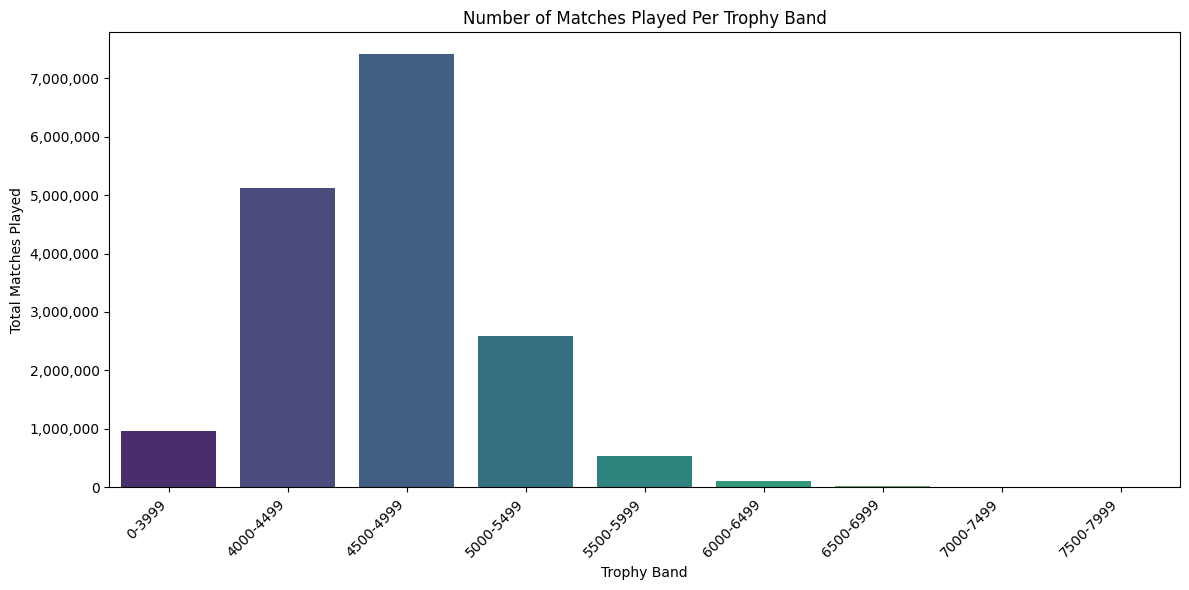

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Convert the cuDF DataFrame to a Pandas DataFrame for plotting
matches_per_trophy_band_pd = matches_per_trophy_band.to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(x='trophy_band', y='total', data=matches_per_trophy_band_pd, palette='viridis', hue='trophy_band', legend=False)
plt.title('Number of Matches Played Per Trophy Band')
plt.xlabel('Trophy Band')
plt.ylabel('Total Matches Played')
plt.xticks(rotation=45, ha='right')

# Format y-axis to avoid scientific notation and use comma separators
formatter = mticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

# Save the figure
plt.savefig('matches_per_trophy_band.png')

# Display the plot
plt.show()

# Clear the figure
plt.clf()

### Summary of Matches Per Trophy Band

From the bar plot showing the 'Number of Matches Played Per Trophy Band', the following observations can be made:

- The trophy band **4500-4999** clearly has the **most activity**, with a significantly higher number of matches played compared to other bands.
- The **4000-4499** and **5000-5499** trophy bands also show substantial activity, following the most active band.
- Conversely, the **7000-7499** and **7500-7999** trophy bands have the **least activity**, indicating fewer players or less frequent gameplay at very high trophy levels.
- There's a general trend where activity decreases as trophy levels increase beyond a certain point, suggesting a more concentrated player base in the mid-range trophy bands.

## Summary:

### Q&A
*   **Which trophy bands have the most and least activity?**
    The trophy band **4500-4999** exhibits the most activity with 7,411,680 matches. Conversely, the **7000-7499** trophy band has the least activity, with 750.5 matches, followed by the **7500-7999** band.

### Data Analysis Key Findings
*   The total number of matches per trophy band was recalculated by summing the 'total' column and dividing by two to correctly account for each match once.
*   The **4500-4999** trophy band recorded the highest number of matches, totaling 7,411,680.0 matches.
*   The **7000-7499** trophy band showed the lowest activity, with only 750.5 matches, followed by the **7500-7999** band.
*   The **4000-4499** and **5000-5499** trophy bands also demonstrate substantial activity, though less than the peak 4500-4999 band.
*   There is a clear trend of decreasing match activity as trophy levels increase beyond the mid-range bands, indicating a more concentrated player base in the middle-tier trophy bands.

### Insights or Next Steps
*   The data suggests that the game's core player base is concentrated in the mid-range trophy bands (e.g., 4000-5500). Future game development, event planning, or monetization strategies could be tailored to engage this significant segment.
*   Investigate the reasons behind the sharp drop-off in activity at higher trophy bands (7000+). This could indicate issues with player retention at elite levels, lack of competitive incentives, or a smaller player pool, warranting further analysis into high-tier player experience.


# Task
Calculate the count of unique decks for each trophy band from the `deck_stats` DataFrame, and then visualize this data using a bar plot. Save the plot as 'unique_decks_per_trophy_band.png' and display it. Finally, summarize the findings from the chart, highlighting which trophy bands exhibit the most and least deck diversity.

## Calculate Unique Decks Per Trophy Band

### Subtask:
Calculate the count of unique decks for each trophy band from the `deck_stats` DataFrame. This will give us the number of distinct deck archetypes present in each trophy range.


**Reasoning**:
To calculate the count of unique decks for each trophy band, I will group the `deck_stats` DataFrame by 'trophy_band' and use the `.size()` method to count the number of decks within each band. The result will then be converted to a DataFrame and assigned a meaningful column name.



In [24]:
unique_decks_per_trophy_band = deck_stats.groupby('trophy_band').size().reset_index(name='unique_deck_count')
print("Number of unique decks per trophy band:")
print(unique_decks_per_trophy_band)

Number of unique decks per trophy band:
  trophy_band  unique_deck_count
0   4500-4999            4201643
1   7000-7499                286
2   6500-6999               1427
3   7500-7999                133
4   5500-5999             102513
5   6000-6499              11453
6      0-3999             818854
7   5000-5499            1065237
8   4000-4499            4345609


**Reasoning**:
To visualize the number of unique decks per trophy band, I will generate a bar plot using the `unique_decks_per_trophy_band` DataFrame, following the instructions for plotting, saving, and displaying the figure.



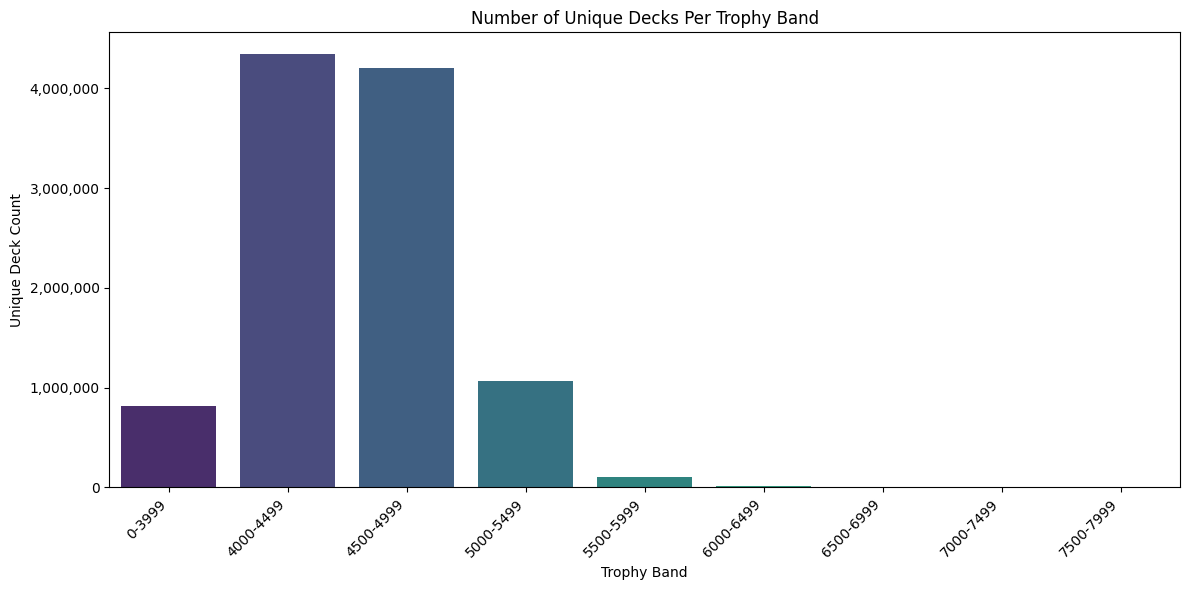

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Convert the cuDF DataFrame to a Pandas DataFrame for plotting
unique_decks_per_trophy_band_pd = unique_decks_per_trophy_band.to_pandas()

plt.figure(figsize=(12, 6))
sns.barplot(x='trophy_band', y='unique_deck_count', data=unique_decks_per_trophy_band_pd, palette='viridis', hue='trophy_band', legend=False)
plt.title('Number of Unique Decks Per Trophy Band')
plt.xlabel('Trophy Band')
plt.ylabel('Unique Deck Count')
plt.xticks(rotation=45, ha='right')

# Format y-axis to avoid scientific notation and use comma separators
formatter = mticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

# Save the figure
plt.savefig('unique_decks_per_trophy_band.png')

# Display the plot
plt.show()

# Clear the figure
plt.clf()

### Summary of Unique Decks Per Trophy Band

From the bar plot showing the 'Number of Unique Decks Per Trophy Band', the following observations can be made:

- The trophy bands **4000-4499** and **4500-4999** exhibit the highest number of unique decks, indicating the greatest deck diversity in these mid-range trophy levels.
- There's a steep decline in unique deck count as trophy levels increase beyond the 5000-5499 range. This suggests that at higher trophy tiers, players tend to converge on a smaller set of optimized or meta decks.
- The **7000-7499** and **7500-7999** trophy bands have the fewest unique decks, reflecting a highly specialized and less diverse meta at the very top competitive levels.
- The **0-3999** band also shows significant deck diversity, likely due to newer players experimenting with various cards before settling on established strategies.

## Summary:

### Q&A
*   The trophy bands **4000-4499** and **4500-4999** exhibit the most deck diversity.
*   The trophy bands **7000-7499** and **7500-7999** exhibit the least deck diversity.

### Data Analysis Key Findings
*   The **4000-4499** trophy band showed the highest number of unique decks with 4,345,609, closely followed by the **4500-4999** band with 4,201,643 unique decks, indicating peak deck diversity in these mid-range trophy levels.
*   A steep decline in unique deck count was observed at higher trophy levels, with the **7000-7499** band having only 286 unique decks and the **7500-7999** band having the fewest at 133 unique decks, signifying a highly specialized and less diverse meta at top competitive tiers.
*   The **0-3999** trophy band also displayed significant deck diversity, suggesting a period of experimentation among newer players.

### Insights or Next Steps
*   The data suggests that the mid-range trophy bands (4000-4999) represent a broad and experimental player base, while higher trophy levels lead to a convergence on a smaller set of highly optimized "meta" decks.
*   Further analysis could explore the specific deck archetypes prevalent in the most diverse bands versus the least diverse bands to understand what constitutes "meta" at different skill levels.
